## Random Forest

- Bagging(Bootstrap Aggregating) (m >= 50 권장)
    - 샘플링 시 데이터를 n개 뽑는다. 
    - with replacement(복원 추출)
    - majority voting (다수결)

- Decision Tree들을 모아모아 강력한 모델로 만들자!

- Bagging + Random subspace method

- Boosting
    - 이전 트리를 보완하는 방식으로 학습되는 앙상블 기법

- Gradient Boosting
    - 이전 트리를 보완하는 방식으로 학습되는 앙상블 기법

- LightGBM
    - 실제 데이터 분석 대회에서 가장 많이 사용하는 효과적인 회귀 모델

<a href='https://colab.research.google.com/drive/1pkBrFuYtFNFWrLQn8Ghl9gD-IZaUBfim?usp=sharing'>실습</a>

In [2]:
import pandas as pd

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
dataset = load_breast_cancer()
X = pd.DataFrame(X, columns = dataset.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# 결측치 확인
x[x.isnull().any(axis = 1)]

# 결측치가 있는 행 삭제
x.dropna()

# 결측값 위에서 채우기
x.fillna(method = 'ffill')

# 결측값 뒤에서 채우기 
x.fillna(method = 'bfill')

# 평균으로 채우기
x.fillna(x.mean())

NameError: name 'x' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



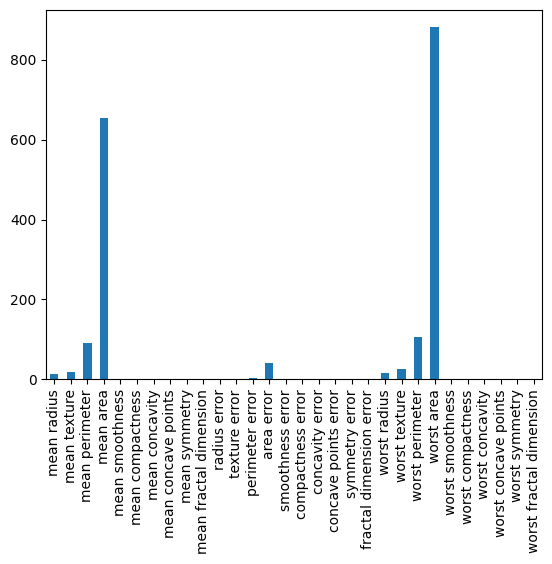

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X, y = load_breast_cancer(return_X_y=True)
# X, y = dataset.data, dataset.target

df = pd.DataFrame(X, columns = dataset.feature_names)

df.mean().plot.bar()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.2, shuffle=True, stratify=dataset['target'], random_state=34)

In [11]:
# Decision Tree 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree 분류기 불러오기
clf = DecisionTreeClassifier()
# Decision Tree 학습을 위해 parameter 채우기
clf.fit(X_train, y_train)
# Decision Tree 테스트를 위해 parameter 채우기
pred = clf.predict(X_test)
# accuracy 계산
acc = accuracy_score(y_test, pred)

print("Accuracy : %.3f" % acc)

Accuracy : 0.912


In [12]:
# Random Forest 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
 # accuracy 계산을 위해서 numpy load
import numpy as np

# Random Forest 분류기 불러오기
clf = RandomForestClassifier()

# Random Forest 학습을 위해 parameter 채우기
clf.fit( X_train, y_train )
# Random Forest 테스트를 위해 parameter 채우기
pred = clf.predict(X_test)
# accuracy 계산
acc = accuracy_score(y_test, pred)

print("Accuracy : %.3f" % acc)

Accuracy : 0.904


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

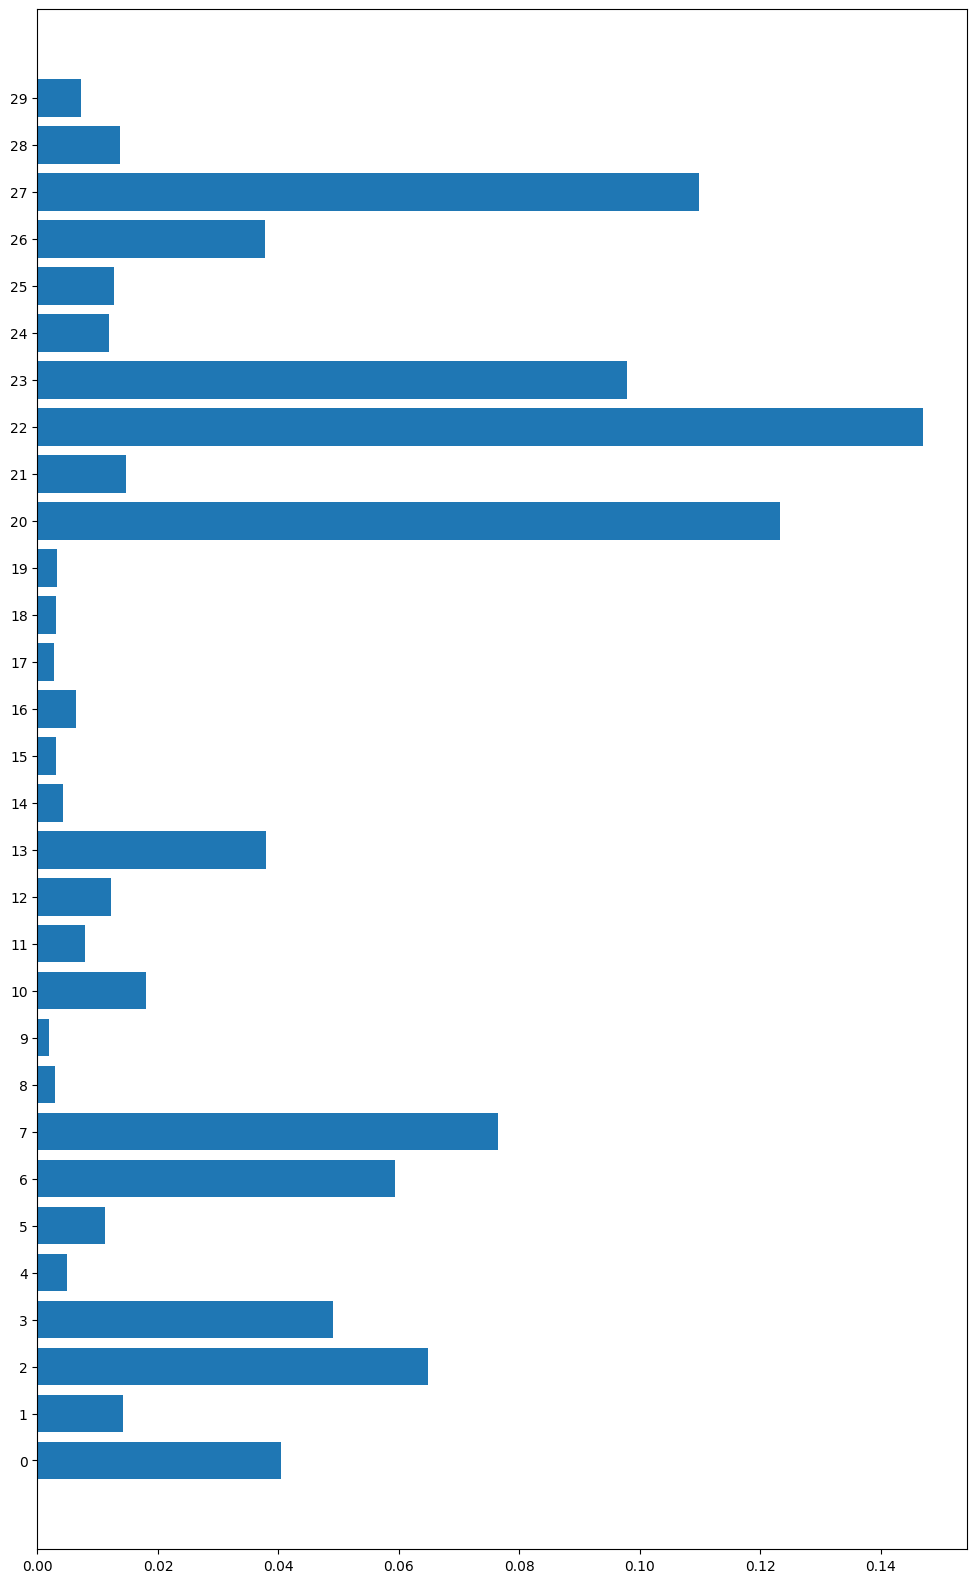

In [13]:
import matplotlib.pyplot as plt

# code from 6번

fig, ax = plt.subplots(figsize=(12, 20))
# 6번에서 완성 코드를 기준으로 feature importance 불러오기
feature_importances = clf.feature_importances_

y_pos = np.arange(len(feature_importances))

ax.barh(y_pos, feature_importances, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(X.columns)
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Feature Importance of Random Forest Classifier')

plt.show()

In [14]:
from sklearn.datasets import load_iris

dataset = load_iris()

dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  